# Вступление 
___
Как вы уже могли догадаться по названию, первый урок модуля посвящен оптимизации работы в Pandas! В следующих шагах мы посмотрим, какими способами можно итерироваться по датафреймам и применять операции к каждому элементу, а также определим, какие варианты являются наиболее эффективными. 

Начнем с самого простого. Логично предположить, что один из самых очевидных вариантов — использовать цикл и проитерироваться по всему датафрейму, применив нужную операцию к каждой строчке.

Первый метод — `pd.iterrows()`, на каждой итерации возвращает строку датафрейма в виде пар (index, series), где первый элемент является индексом, а содержимое самого ряда представляется в виде Series. Таким образом, можно использовать его в цикле, например: 
```
for index, row in df[:1].iterrows():
    print(f"Тип индекса: {type(index)},\nТип содержимого строки: {type(row)}")
```
Тип индекса: `< class 'int' >`,
Тип содержимого строки: `< class 'pandas.core.series.Series' >`

Посмотрим, в каком формате возвращается содержимое строки:
```
for index, row in df[:2].iterrows():
    print("Индекс: {},\nСодержимое строки:\n{}\n".format(index, row))
```
```
Индекс: 0,
Содержимое строки:
key                  2009-06-15 17:26:21.0000001
fare_amount                                  4.5
pickup_datetime        2009-06-15 17:26:21+00:00
pickup_longitude                        -73.8443
pickup_latitude                          40.7213
dropoff_longitude                       -73.8416
dropoff_latitude                         40.7123
passenger_count                                1
Name: 0, dtype: object

Индекс: 1,
Содержимое строки:
key                  2010-01-05 16:52:16.0000002
fare_amount                                 16.9
pickup_datetime        2010-01-05 16:52:16+00:00
pickup_longitude                         -74.016
pickup_latitude                          40.7113
dropoff_longitude                       -73.9793
dropoff_latitude                          40.782
passenger_count                                1
Name: 1, dtype: object
```
К конкретным колонкам тоже можно обратиться. Так, выведем индекс и число пассажиров для первых трех наблюдений:
```
for index, row in df[:3].iterrows():
    print("Индекс {}; Число пассажиров: {}".format(index, row['passenger_count']))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2
```
Этот метод является одним из наименее эффективных, подробнее о причинах можно почитать вот здесь. Тем не менее, работает быстрее, чем самые обычные циклы.

In [17]:
import pandas as pd
import numpy as np
import time

import seaborn as sns #библиотека для построения графиков
import matplotlib.pyplot as plt

In [54]:
df = pd.DataFrame(
                    {
                        'a': [1, 2, 3],
                        'b': [10, 20, 30]

                    })

In [12]:
for i, row in df.iterrows():
    print(i, row, sep='\n')

0
a     1
b    10
Name: 0, dtype: int64
1
a     2
b    20
Name: 1, dtype: int64
2
a     3
b    30
Name: 2, dtype: int64


In [27]:
url = 'https://stepik.org/media/attachments/lesson/363873/nyc.csv.zip'

In [37]:
nyc = pd.read_csv(url, compression='zip') #исходный дата-фрейм

In [29]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [20]:
nyc.shape

(50000, 8)

In [21]:
for index, row in nyc[:1].iterrows():
    print(f"Тип индекса: {type(index)},\nТип содержимого строки: {type(row)}") #типы воводимых данных

Тип индекса: <class 'int'>,
Тип содержимого строки: <class 'pandas.core.series.Series'>


In [22]:
for index, row in nyc[:2].iterrows():
    print("Индекс: {},\nСодержимое строки:\n{}\n".format(index, row)) #что выводится в этом методе

Индекс: 0,
Содержимое строки:
key                  2009-06-15 17:26:21.0000001
fare_amount                                  4.5
pickup_datetime          2009-06-15 17:26:21 UTC
pickup_longitude                        -73.8443
pickup_latitude                          40.7213
dropoff_longitude                       -73.8416
dropoff_latitude                         40.7123
passenger_count                                1
Name: 0, dtype: object

Индекс: 1,
Содержимое строки:
key                  2010-01-05 16:52:16.0000002
fare_amount                                 16.9
pickup_datetime          2010-01-05 16:52:16 UTC
pickup_longitude                         -74.016
pickup_latitude                          40.7113
dropoff_longitude                       -73.9793
dropoff_latitude                          40.782
passenger_count                                1
Name: 1, dtype: object



In [23]:
for index, row in nyc[:3].iterrows():
    print("Индекс {}; Число пассажиров: {}".format(index, row['passenger_count']))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


In [24]:
start = time.time()
for index, row in nyc[:3].iterrows():
    print("Индекс {}; Число пассажиров: {}".format(index, row['passenger_count']))
end = time.time()
print(end - start) #использование подсчета времени сколько заняла операция

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2
0.004039287567138672


# Задание 1
___

Перейдем к практике!Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием. Более подробно ознакомиться с формулой можно здесь.

![Формула](https://miro.medium.com/max/700/1*6amISXF-p34a4H9xRoJk1Q@2x.png)

`1φ` и `2φ` — широта исходного местоположения и широта пункта назначения в радианах,  
`1λ` и `2λ` — долгота исходного местоположения и долгота пункта назначения в радианах,
rr — радиус сферы, будем считать его равным 6371.
Таким образом, сама функция haversine() должна принимать на вход 5 параметров, один из которых должен иметь значение по умолчанию. \
```
def haversine(..., ..., ..., ..., radius=6371):
    # ваш код
```
Саму функцию можно применить как используя обычный цикл...
```
dists = [ ]
for i, row in df.iterrows():
    dists.append(haversine(row['...'], ..., ..., ...))
df['distance'] = dists
```
так и используя более компактный вариант:
```
df['distance'] = pd.Series(haversine(row['...'], ..., ..., ...) for i, row in df.iterrows())
```
Датасет, с которым мы будем работать – данные о поездках в Нью-Йорке. Он уже сохранен в переменную nyc, но вы можете самостоятельно подгрузить его отсюда и потренироваться у себя в ноутбуке. Сам он является небольшой частью большего датасета. 

- pickup_datetime — дата начала поездки
- pickup_longitude — долгота исходного местоположения
- pickup_latitude — широта исходного местоположения
- dropoff_longitude — долгота пункта назначения
- dropoff_latitude — широта пункта назначения
- fare_amount — стоимость поездки в долларах 
- passenger_count — число пассажиров \

Для того, чтобы оценить скорость выполнения операции, воспользуйтесь magic-функцией %timeit (или %%time), поместив её в начало ячейки. В дальнейшем результаты её выполнения позволят нам сравнить изученные методы и понять, какой из них справляется быстрее. В код решения её добавлять не нужно.

Полезные ссылки:

Проверить правильность подсчетов написанной функции можно тут.
Как перевести в радианы

Перходим к воспроизведению формулы расчета расстояния

In [39]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [45]:
def haversine(fi_1, lam_1, fi_2, lam_2, radius=6371):
    # перевод в градусов радианы
    fi_1, lam_1, fi_2, lam_2 = [np.radians(x) for x in (fi_1, lam_1, fi_2, lam_2)]
    
    # выводим результаты
    return 2 * radius * np.arcsin(((np.sin((fi_2 - fi_1) / 2)) ** 2 + np.cos(fi_1) * np.cos(fi_2) * (np.sin((lam_2 - lam_1) / 2)) ** 2) ** 0.5)

In [46]:
dists = [ ]

for i, row in nyc.iterrows():
    dists.append(haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']))

In [47]:
nyc['distance'] = dists # добавление новой колонки растояний, со значением расстояния посчитаного ранее

In [48]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [44]:
start = time.time()
dists = [ ]
for i, row in nyc.iterrows():
    dists.append(haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']))
end = time.time()
print(end - start) #использование подсчета времени сколько заняла операция

5.848231792449951


# Задание 2
___
На первый взгляд, pd.iterrows() вполне хорошо справляется со своей задачей и выполнение операции не занимает много времени!  

Давайте попробуем еще один метод, pd.itertuples, который на каждой итерации возвращает именованный кортеж (named tuple) для каждой строки датафрейма. Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки. 

Обратите внимание, что, в отличие от первого метода, строка возвращается уже не как Series:
```
for row in df[:1].itertuples(name='ride'):  # исп. "ride" как название
    print(f"Тип содержимого: {type(row)}")
```
Тип содержимого: < class 'pandas.core.frame.ride' >

Посмотрим на формат вывода:
```
for row in df[:3].itertuples(name='custom_name'):
    print(row)

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime=Timestamp('2009-06-15 17:26:21+0000', tz='UTC'), pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1)
custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime=Timestamp('2010-01-05 16:52:16+0000', tz='UTC'), pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1)
custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime=Timestamp('2011-08-18 00:35:00+0000', tz='UTC'), pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2)
```
Индекс и число пассажиров для первых трех наблюдений:
```
for row in df[:3].itertuples():
    print("Индекс {}; Число пассажиров: {}".format(row.Index, row.passenger_count))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2
```
Задача: проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples(), а затем сравните время выполнения.

Данные: nyc, уже сохранены в nyc.

In [59]:
for row in df.itertuples():
    print(row)

Pandas(Index=0, a=1, b=10)
Pandas(Index=1, a=2, b=20)
Pandas(Index=2, a=3, b=30)


In [50]:
nyc = pd.read_csv(url, compression='zip') #исходный дата-фрейм

In [51]:
start = time.time()
dists = [ ]
for row in nyc.itertuples():
    dists.append(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude))
end = time.time()
print(end - start)
nyc['distance'] = dists

0.8290092945098877


In [60]:
# такой подсчет возможет только в jupyte notebook
%%timeit
dists = [ ]
for row in nyc.itertuples():
    dists.append(haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude))

791 ms ± 36.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Этот метод возвращает именованный кортеж, к которому можно обратиться по навзаниям строк

# Задание 3
___
Еще один часто используемый метод pd.apply() применяет заданную функцию вдоль определенной оси (axis=0 – строки; axis=1 – столбцы), и является более эффективным способом, чем pd.iterrows() за счет использования внутренних оптимизаций в pandas. Тем не менее, все равно подразумевает итерацию по всем рядам.
```
df['distance'] = df[['col1', 'col2', 'col3', 'col4']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)
```
**более медленный вариант** \
```
df['distance'] = df.apply(lambda x: haversine(x['col1'], x['col2'], x['col3'], x['col4']), axis=1)
```
В столбец distance датафрейма nyc сохраните результат подсчета расстояния между точками отправки и прибытия, используя написанную ранее функцию. В переменную longest сохраните самое большое расстояние. Не забудьте проверить скорость выполнения операции (в код включать не нужно)! 

In [61]:
%%timeit
nyc['distance'] = nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(lambda row: haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude), axis=1)
end = time.time()

2.44 s ± 28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
# использование lambda функций
nyc['distance'] = nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(lambda row: haversine(row.pickup_latitude, row.pickup_longitude, row.dropoff_latitude, row.dropoff_longitude), axis=1)
longest = nyc.distance.max() 

In [63]:
nyc_1 = nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(
    lambda x: haversine(x[0], x[1], x[2], x[3]), axis=1
)
#можно передвать вот так аргументы в лямбда функцию

In [64]:
nyc_1

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Length: 50000, dtype: float64

In [65]:
%%timeit
nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(
    lambda x: haversine(x[0], x[1], x[2], x[3]), axis=1
)

1.46 s ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Задание 4
___
В целом, itertuples — это именно то, что нам нужно! Но есть пара моментов.

Оказывается, в нашем случае itertuples — не предел. На всех предыдущих шагах мы использовали циклы, что не очень хорошо. Почему же?

Базовые объекты в pandas — Series и DataFrame, которые представляют собой одномерные и двумерные массивы (arrays) соответственно. Так, векторизация — процесс выполнения операций над массивами. В pandas есть довольно большой набор векторизованных функций, и их использование во многих случаях предпочтительнее обычных циклов, поскольку они предназначены для работы именно с Series. К таким функциям относятся, например, sum и agg. С помощью векторизации можно получить ещё большее ускорение, значительно уменьшив количество итераций. Иными словами, действия будут происходят сразу над всей серией, а не над каждым элементом по отдельности.

Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!
```
df['distance'] = haversine(df['col1'], df['col2'], df['col3'], df['col4'])
```
Убедимся, что векторизованные операции работают намного быстрее! Создайте функцию для подсчета расстояния haversine, описанную в первом шаге, и примените её к датасету nyc. Результат сохраните в колонку distance. 


In [74]:
def haversine(fi_1, lam_1, fi_2, lam_2, radius=6371):
    # перевод в градусов радианы
    fi_1, lam_1, fi_2, lam_2 = [np.radians(x) for x in (fi_1, lam_1, fi_2, lam_2)]
    
    # выводим результаты
    return 2 * radius * np.arcsin(((np.sin((fi_2 - fi_1) / 2)) ** 2 + np.cos(fi_1) * np.cos(fi_2) * (np.sin((lam_2 - lam_1) / 2)) ** 2) ** 0.5)

In [69]:
%%timeit
nyc['distance'] = haversine(nyc['pickup_latitude'], nyc['pickup_longitude'], nyc['dropoff_latitude'], nyc['dropoff_longitude'])

8.52 ms ± 453 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Задание 5
___
Don't stop me now, можно еще быстрее! Опять же, все довольно просто.

В предыдущем шаге мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 
```
df['distance'] = haversine(df['col1'].values, df['col2'].values, df['col3'].values, df['col4'].values)
```
Как выглядят данные такого формата? 
```
df.pickup_longitude.values

array([-73.844311, -74.016048, -73.982738, ..., -74.002698, -73.946062,
   -73.932603])
```
Создайте функцию для подсчета расстояния haversine, описанную в первом степе, и примените её к датасету nyc. Результат сохраните в колонку distance.

In [70]:
nyc = pd.read_csv(url, compression='zip') #исходный дата-фрейм

In [72]:
def haversine(fi_1, lam_1, fi_2, lam_2, radius=6371):
    # перевод в градусов радианы
    fi_1, lam_1, fi_2, lam_2 = [np.radians(x) for x in (fi_1, lam_1, fi_2, lam_2)]
    
    # выводим результаты
    return 2 * radius * np.arcsin(((np.sin((fi_2 - fi_1) / 2)) ** 2 + np.cos(fi_1) * np.cos(fi_2) * (np.sin((lam_2 - lam_1) / 2)) ** 2) ** 0.5)

In [73]:
%%timeit
nyc['distance'] = haversine(nyc['pickup_latitude'].values, nyc['pickup_longitude'].values, nyc['dropoff_latitude'].values, nyc['dropoff_longitude'].values)

5.4 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


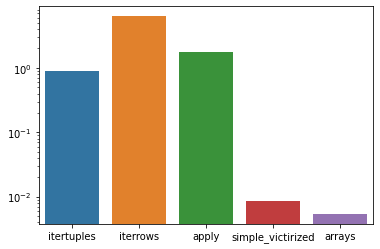

In [76]:
sns.barplot(x=['itertuples', 'iterrows', 'apply', 'simple_victirized', 'arrays'], y=[0.89, 6.3, 1.75, 0.00852, 0.0054]) #построение графика
plt.yscale('log')

# Задание 6
___
Давайте подробнее посмотрим на информацию о самой длинной поездке в датасете nyc с 50 000 наблюдений.
```
key                  2012-05-12 10:48:00.00000020
fare_amount                                  49.8
pickup_datetime         2012-05-12 10:48:00+00:00
pickup_longitude                         -74.0149
pickup_latitude                           40.7134
dropoff_longitude                               0
dropoff_latitude                                0
passenger_count                                 1
distance                                  8667.82
Name: 48996, dtype: object
```
Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко?

Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.

In [79]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [80]:
nyc.query('distance == distance.max()')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
48996,2012-05-12 10:48:00.00000020,49.8,2012-05-12 10:48:00 UTC,-74.014917,40.713382,0.0,0.0,1,8667.818812


In [86]:
nyc[['dropoff_longitude', 'dropoff_latitude']] \
    .eq(0) \
    .sum(1) \
    .gt(0) \
    .sum()

958

In [91]:
nyc.query('dropoff_longitude == 0 or dropoff_latitude == 0').shape[0]

958

# Задание 7
___
Предположим, наша цель всё ещё состоит в поиске самых дальних поездок. Естественно, текущие данные совсем не годятся — некоторые такси, согласно данным, уезжают и приезжают из океана.

Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных (в итоге – 4 галочки).

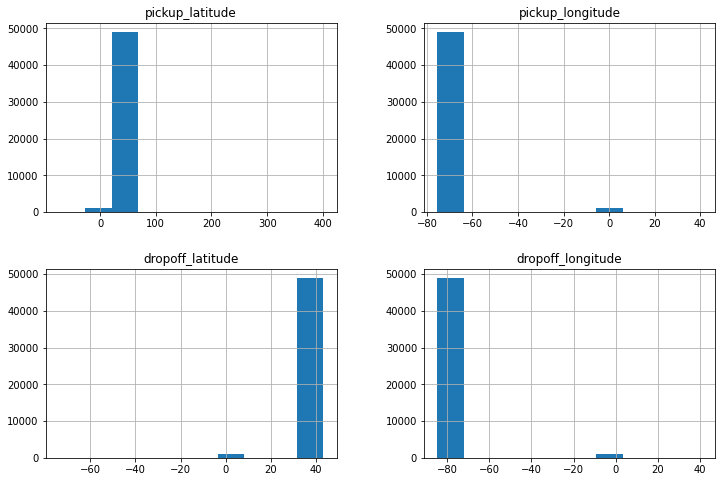

In [94]:
nyc[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].hist(figsize=(12, 8));

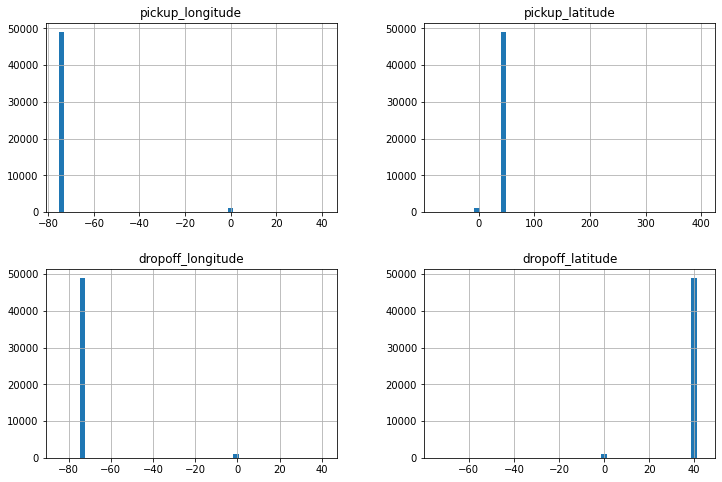

In [96]:
nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].hist(figsize=[12, 8], bins=50);

# Задание 8
___
Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.

Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной `distance`. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние

In [97]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [98]:
nyc_distance_max = nyc.query('10 < pickup_latitude < 120 and pickup_longitude < -60 and 10 < dropoff_latitude and dropoff_longitude < -60')

In [99]:
nyc_distance_max.query('distance < 50', inplace=True) #перезаписывает переменную на месте

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
nyc_distance_max.query('distance == distance.max()')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988


In [101]:
nyc_distance_max.query('distance == distance.max()').fare_amount

33502    136.0
Name: fare_amount, dtype: float64